In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Ellipse
import matplotlib.patches as patches
import librosa

%run graphing_function_recent.ipynb

In [2]:
#Use this for all adjustable values 
#input file paths here (include .csv):
video_path = r'\\10.25.16.5\yaochen\Active\DLC\Final_Models\Lindsey\escape_behavior_2-lindsey_christinger-2024-06-13_v1\D1D2\coords_csv\Coordcontrol1_P2_7_17_24_videoDLC_resnet50_escape_behavior_2Jun13shuffle1_1030000_filtered_day.csv'
time_path = r'\\10.25.16.5\yaochen\Active\Lindsey\set_up_testing\D1D2\Control\video_time\control1_P2_7_17_24_video_time0.csv'
audio_path = r'\\10.25.16.5\yaochen\Active\Lindsey\set_up_testing\D1D2\Control\stimulus_time\control1_P2_7_17_24_stimulus_time0.csv'

north_pixel = 109
south_pixel = 429
east_pixel = 489
west_pixel = 148
shelter_x_pixel = 329
shelter_y_pixel = 407

#estimate for when mouse reaches shelter
escape_done = 18 #time mouse reaches shelter location

In [3]:
#manually decide?
escape_response = True
freezing_response = False
##small_angle = 

In [4]:
#read in DLC data, convert to cm, center platform at 0,0
shelter_x, shelter_y, x_diam, y_diam, coord_scaled = single_mouse_data(north_pixel, south_pixel, east_pixel, west_pixel, shelter_x_pixel, shelter_y_pixel, video_path)

In [5]:
#replace any head, nose, or center points with likelihood < .9 with NA
filter_data(.8, coord_scaled)

In [6]:
#coord_filtered

In [7]:
timestamp_df = convert_time(time_path, coord_scaled, audio_path, 1)

In [8]:
coord_scaled

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,center_x,center_y,center_likelihood,spine2_x,spine2_y,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood,time_set
0,0,0,NaN,NaN,0.000356,NaN,NaN,0.337904,8.437126,29.456874,...,7.582195,26.755692,0.997805,6.839700,25.576130,0.999982,6.291088,24.529978,0.999906,-341.018317
1,1,1,NaN,NaN,0.000216,NaN,NaN,0.205046,8.486580,29.648441,...,7.582195,26.897096,0.999298,6.845787,25.611511,0.999993,6.303076,24.641684,0.999949,-340.980877
2,2,2,NaN,NaN,0.000381,NaN,NaN,0.248312,8.492558,29.648441,...,7.582195,26.908352,0.999468,6.845787,25.662722,0.999996,6.303076,24.688067,0.999937,-340.940877
3,3,3,NaN,NaN,0.000530,NaN,NaN,0.095068,8.492558,29.648441,...,7.582195,26.919173,0.998800,6.845787,25.695666,0.999992,6.303076,24.688067,0.999912,-340.900275
4,4,4,NaN,NaN,0.000248,NaN,NaN,0.181302,8.492558,29.648441,...,7.582195,26.919173,0.999225,6.845787,25.712821,0.999995,6.306919,24.801326,0.999853,-340.859763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10132,10132,10132,-5.999902,-30.201282,0.000500,-6.549754,-30.815691,0.000027,-30.472109,-3.063735,...,-11.653068,-29.256324,0.000227,2.471879,-29.587126,0.000013,-31.292184,0.709434,0.000994,64.360870
10133,10133,10133,-5.999902,-30.201282,0.000268,-6.549754,-30.815691,0.000023,-30.456016,-2.985389,...,-11.653068,-29.256324,0.000176,2.471879,-29.587126,0.000009,-31.304742,0.713197,0.001238,64.400576
10134,10134,10134,-5.999902,-30.201282,0.000328,-6.549754,-30.815691,0.000028,-30.455279,-2.985389,...,-11.653068,-29.256324,0.000215,2.455949,-29.618876,0.000012,-31.304742,0.713197,0.001053,64.440550
10135,10135,10135,-5.999902,-30.201282,0.000297,-6.549754,-30.815691,0.000017,-30.455279,-3.063735,...,-11.653068,-29.256324,0.000207,0.880600,-31.112558,0.000012,-31.334263,0.713197,0.001136,64.480550


In [9]:
timestamp_df

,timestamp,date_time,naive_time,seconds
0,2024-07-17T11:46:27.3764864-05:00,2024-07-17 11:46:27.376486400-05:00,11:46:27.376486,42387.376486
1,2024-07-17T11:46:27.4139264-05:00,2024-07-17 11:46:27.413926400-05:00,11:46:27.413926,42387.413926
2,2024-07-17T11:46:27.4539264-05:00,2024-07-17 11:46:27.453926400-05:00,11:46:27.453926,42387.453926
3,2024-07-17T11:46:27.4945280-05:00,2024-07-17 11:46:27.494528-05:00,11:46:27.494528,42387.494528
4,2024-07-17T11:46:27.5350400-05:00,2024-07-17 11:46:27.535040-05:00,11:46:27.535040,42387.535040
...,...,...,...,...
10132,2024-07-17T11:53:12.7556736-05:00,2024-07-17 11:53:12.755673600-05:00,11:53:12.755673,42792.755673
10133,2024-07-17T11:53:12.7953792-05:00,2024-07-17 11:53:12.795379200-05:00,11:53:12.795379,42792.795379
10134,2024-07-17T11:53:12.8353536-05:00,2024-07-17 11:53:12.835353600-05:00,11:53:12.835353,42792.835353
10135,2024-07-17T11:53:12.8753536-05:00,2024-07-17 11:53:12.875353600-05:00,11:53:12.875353,42792.875353


In [10]:
#calculate displacement as 'displacement'
displacement(shelter_x, shelter_y, coord_scaled)

In [11]:
#calculate speed as 'speed' and change in displacement as 'delta_vector'
total_distance = speed(coord_scaled)

In [12]:
#calculate head angle as 'head_angle'
angle(shelter_x, shelter_y, coord_scaled)

In [13]:
#calculate head angle speed as 'angle_speed'
angle_speed(coord_scaled)

In [14]:
#create dataframes isolated to 4 ranges: just shelter reaching, 3 seconds before and 6 after, 2 before and 4 after, and 1 where you can input your own parameters
#return 4 dataframes 
escape_only, four_second, six_second, long_range, escape_estimate = dataframe_ranges(-7, 14, escape_done,coord_scaled)

In [15]:
escape_only

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood,time_set,displacement,speed,delta_vector,head_angle,angle_speed
8524,8524,8524,29.694287,0.610870,0.276290,30.217494,1.278045,0.999112,31.026623,1.411351,...,0.997507,28.134373,6.728723,0.997614,0.024768,35.514906,12.236543,0.490722,1.629192,-7.895333
8525,8525,8525,29.476215,0.011310,0.530903,30.230733,0.854898,0.991586,31.058783,0.971880,...,0.996162,28.134373,6.142455,0.998887,0.064461,35.941148,15.667333,0.621883,1.572606,-1.425597
8526,8526,8526,29.258143,-0.588250,0.433015,30.388322,0.297729,0.993947,31.058783,0.469105,...,0.995290,27.995710,5.647679,0.999878,0.109977,36.541006,20.359913,0.926702,1.404411,-3.695304
8527,8527,8527,29.040071,-1.187809,0.231895,30.388322,0.016946,0.997355,31.058783,0.200392,...,0.998834,27.995710,5.118934,0.999502,0.144435,36.814757,12.957090,0.446475,1.474146,2.023794
8528,8528,8528,28.821999,-1.787369,0.092168,30.388322,-0.539961,0.999087,31.058783,-0.303931,...,0.999553,27.995710,4.917913,0.998902,0.184461,37.028195,8.052492,0.322309,1.427888,-1.155703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8947,8947,8947,-0.944996,29.850796,0.000435,-2.685990,30.779382,0.018715,-3.914220,31.750808,...,0.999990,-5.321558,26.418218,0.999827,16.948915,6.633516,4.046291,0.161439,0.285330,0.706510
8948,8948,8948,-0.814593,29.885376,0.000369,-2.593583,30.798971,0.010676,-3.914220,31.715211,...,0.999953,-5.039151,26.604875,0.999677,16.988659,6.573132,1.687855,0.067082,0.313296,0.703673
8949,8949,8949,-0.684191,29.919956,0.000490,-2.501176,30.818560,0.023356,-3.914220,31.700592,...,0.999921,-4.865113,26.623567,0.999660,17.028659,6.377882,5.448374,0.217935,0.341052,0.693891
8950,8950,8950,-0.553788,29.954536,0.000358,-2.408770,30.838149,0.030551,-3.737098,31.700592,...,0.999811,-4.545561,26.642776,0.999462,17.068659,6.191684,5.235604,0.209424,0.368607,0.688875


<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

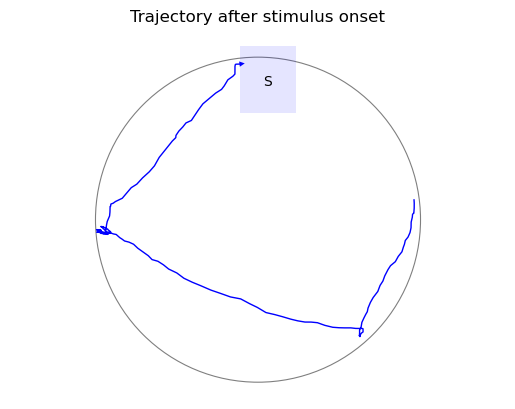

In [16]:
trajectory(shelter_x, shelter_y, x_diam, y_diam, escape_only)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

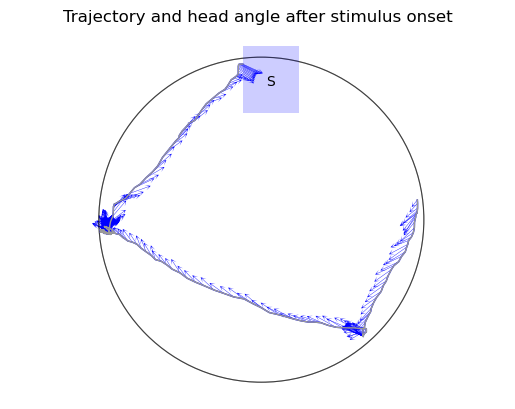

In [17]:
head_angle_trajectory_figure(shelter_x, shelter_y, x_diam, y_diam, escape_only)

In [18]:
escape_only

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood,time_set,displacement,speed,delta_vector,head_angle,angle_speed
8524,8524,8524,29.694287,0.610870,0.276290,30.217494,1.278045,0.999112,31.026623,1.411351,...,0.997507,28.134373,6.728723,0.997614,0.024768,35.514906,12.236543,0.490722,1.629192,-7.895333
8525,8525,8525,29.476215,0.011310,0.530903,30.230733,0.854898,0.991586,31.058783,0.971880,...,0.996162,28.134373,6.142455,0.998887,0.064461,35.941148,15.667333,0.621883,1.572606,-1.425597
8526,8526,8526,29.258143,-0.588250,0.433015,30.388322,0.297729,0.993947,31.058783,0.469105,...,0.995290,27.995710,5.647679,0.999878,0.109977,36.541006,20.359913,0.926702,1.404411,-3.695304
8527,8527,8527,29.040071,-1.187809,0.231895,30.388322,0.016946,0.997355,31.058783,0.200392,...,0.998834,27.995710,5.118934,0.999502,0.144435,36.814757,12.957090,0.446475,1.474146,2.023794
8528,8528,8528,28.821999,-1.787369,0.092168,30.388322,-0.539961,0.999087,31.058783,-0.303931,...,0.999553,27.995710,4.917913,0.998902,0.184461,37.028195,8.052492,0.322309,1.427888,-1.155703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8947,8947,8947,-0.944996,29.850796,0.000435,-2.685990,30.779382,0.018715,-3.914220,31.750808,...,0.999990,-5.321558,26.418218,0.999827,16.948915,6.633516,4.046291,0.161439,0.285330,0.706510
8948,8948,8948,-0.814593,29.885376,0.000369,-2.593583,30.798971,0.010676,-3.914220,31.715211,...,0.999953,-5.039151,26.604875,0.999677,16.988659,6.573132,1.687855,0.067082,0.313296,0.703673
8949,8949,8949,-0.684191,29.919956,0.000490,-2.501176,30.818560,0.023356,-3.914220,31.700592,...,0.999921,-4.865113,26.623567,0.999660,17.028659,6.377882,5.448374,0.217935,0.341052,0.693891
8950,8950,8950,-0.553788,29.954536,0.000358,-2.408770,30.838149,0.030551,-3.737098,31.700592,...,0.999811,-4.545561,26.642776,0.999462,17.068659,6.191684,5.235604,0.209424,0.368607,0.688875


<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

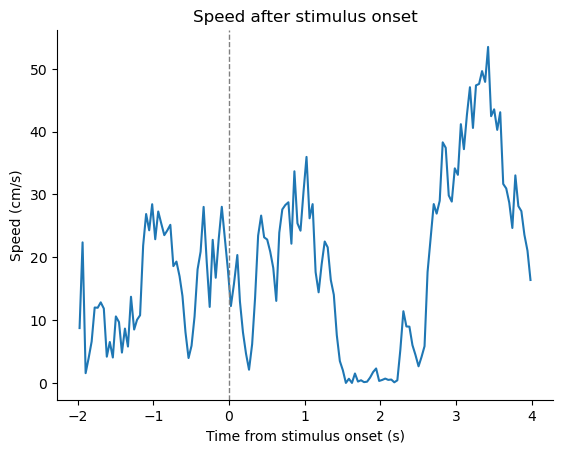

In [19]:
speed_figure(four_second['time_set'].iloc[-1],4, four_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

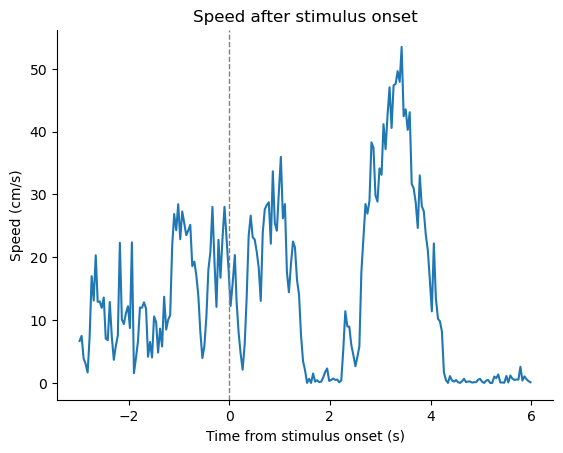

In [20]:
speed_figure(six_second['time_set'].iloc[-1],4, six_second)


<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

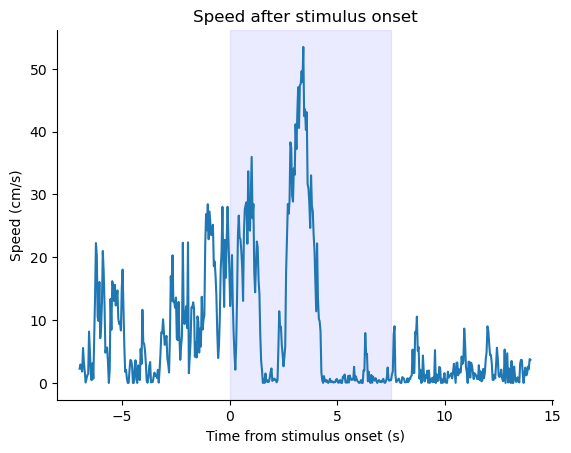

In [21]:
speed_figure(7.5,9, long_range)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

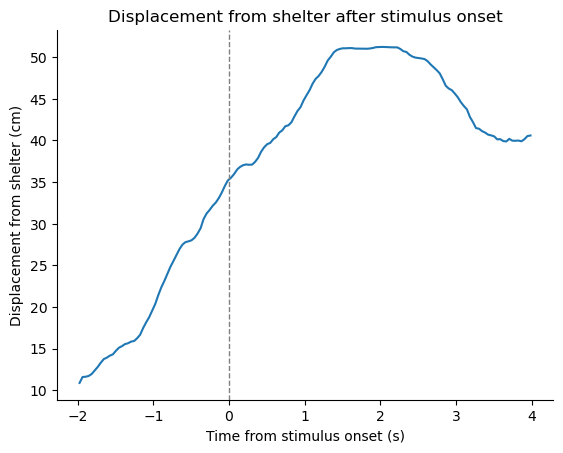

In [22]:
displacement_figure(four_second['time_set'].iloc[-1],4, four_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

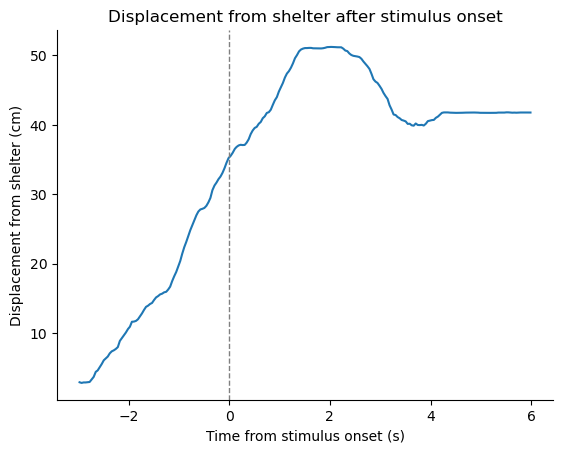

In [23]:
displacement_figure(six_second['time_set'].iloc[-1],4, six_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

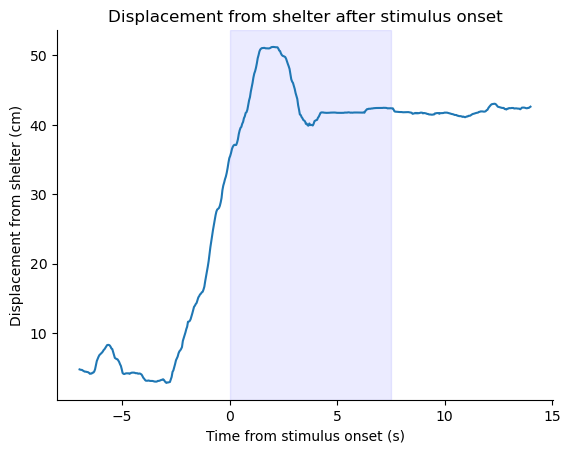

In [24]:
displacement_figure(7.5,9, long_range)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

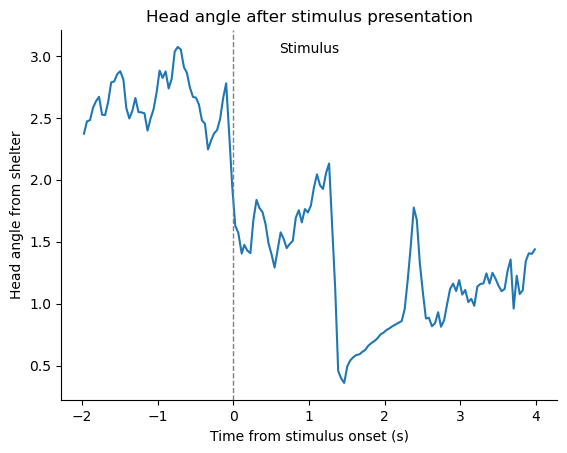

In [25]:
head_angle_figure(four_second['time_set'].iloc[-1],4, four_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

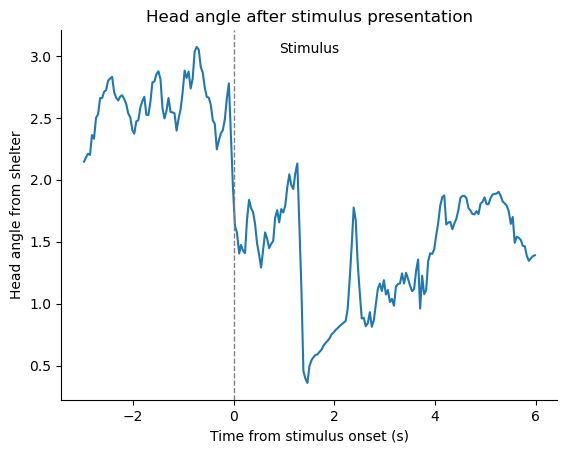

In [26]:
head_angle_figure(six_second['time_set'].iloc[-1],4, six_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

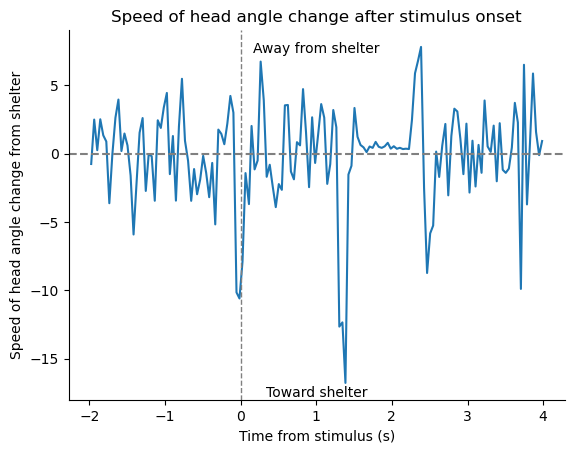

In [27]:
angle_speed_figure(four_second['time_set'].iloc[-1], 4,four_second)

In [28]:
ratio, initial_displacement, total_distance = linearity_ratio(escape_only)

In [29]:
#shelter_rotation(shelter_x, shelter_y, escape_only)

In [30]:
escape_only

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood,time_set,displacement,speed,delta_vector,head_angle,angle_speed
8524,8524,8524,29.694287,0.610870,0.276290,30.217494,1.278045,0.999112,31.026623,1.411351,...,0.997507,28.134373,6.728723,0.997614,0.024768,35.514906,12.236543,0.490722,1.629192,-7.895333
8525,8525,8525,29.476215,0.011310,0.530903,30.230733,0.854898,0.991586,31.058783,0.971880,...,0.996162,28.134373,6.142455,0.998887,0.064461,35.941148,15.667333,0.621883,1.572606,-1.425597
8526,8526,8526,29.258143,-0.588250,0.433015,30.388322,0.297729,0.993947,31.058783,0.469105,...,0.995290,27.995710,5.647679,0.999878,0.109977,36.541006,20.359913,0.926702,1.404411,-3.695304
8527,8527,8527,29.040071,-1.187809,0.231895,30.388322,0.016946,0.997355,31.058783,0.200392,...,0.998834,27.995710,5.118934,0.999502,0.144435,36.814757,12.957090,0.446475,1.474146,2.023794
8528,8528,8528,28.821999,-1.787369,0.092168,30.388322,-0.539961,0.999087,31.058783,-0.303931,...,0.999553,27.995710,4.917913,0.998902,0.184461,37.028195,8.052492,0.322309,1.427888,-1.155703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8947,8947,8947,-0.944996,29.850796,0.000435,-2.685990,30.779382,0.018715,-3.914220,31.750808,...,0.999990,-5.321558,26.418218,0.999827,16.948915,6.633516,4.046291,0.161439,0.285330,0.706510
8948,8948,8948,-0.814593,29.885376,0.000369,-2.593583,30.798971,0.010676,-3.914220,31.715211,...,0.999953,-5.039151,26.604875,0.999677,16.988659,6.573132,1.687855,0.067082,0.313296,0.703673
8949,8949,8949,-0.684191,29.919956,0.000490,-2.501176,30.818560,0.023356,-3.914220,31.700592,...,0.999921,-4.865113,26.623567,0.999660,17.028659,6.377882,5.448374,0.217935,0.341052,0.693891
8950,8950,8950,-0.553788,29.954536,0.000358,-2.408770,30.838149,0.030551,-3.737098,31.700592,...,0.999811,-4.545561,26.642776,0.999462,17.068659,6.191684,5.235604,0.209424,0.368607,0.688875


In [31]:
likelihood_data, likelihood_minus_nose, likelihood_center = likelihood_check(0, 8, .9, coord_scaled)

In [32]:
likelihood_data #need to adjust time frame to be useful 

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood,time_set,displacement,speed,delta_vector,head_angle,angle_speed
8524,8524,8524,29.694287,0.610870,0.276290,30.217494,1.278045,0.999112,31.026623,1.411351,...,0.997507,28.134373,6.728723,0.997614,0.024768,35.514906,12.236543,0.490722,1.629192,-7.895333
8525,8525,8525,29.476215,0.011310,0.530903,30.230733,0.854898,0.991586,31.058783,0.971880,...,0.996162,28.134373,6.142455,0.998887,0.064461,35.941148,15.667333,0.621883,1.572606,-1.425597
8526,8526,8526,29.258143,-0.588250,0.433015,30.388322,0.297729,0.993947,31.058783,0.469105,...,0.995290,27.995710,5.647679,0.999878,0.109977,36.541006,20.359913,0.926702,1.404411,-3.695304
8527,8527,8527,29.040071,-1.187809,0.231895,30.388322,0.016946,0.997355,31.058783,0.200392,...,0.998834,27.995710,5.118934,0.999502,0.144435,36.814757,12.957090,0.446475,1.474146,2.023794
8528,8528,8528,28.821999,-1.787369,0.092168,30.388322,-0.539961,0.999087,31.058783,-0.303931,...,0.999553,27.995710,4.917913,0.998902,0.184461,37.028195,8.052492,0.322309,1.427888,-1.155703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8709,8709,8709,-31.275857,-0.093600,0.052411,-31.849342,-1.829303,0.999990,-31.966321,-2.650920,...,0.999998,-25.632147,-3.426128,0.999991,7.426445,42.381126,0.337047,0.013072,0.556435,0.072916
8710,8710,8710,-31.257991,-0.082069,0.066173,-31.822385,-1.829303,0.999991,-31.938067,-2.650920,...,0.999997,-25.632147,-3.437396,0.999988,7.466278,42.393472,0.480337,0.019133,0.562713,0.157607
8711,8711,8711,-31.240124,-0.070538,0.081135,-31.820431,-1.807715,0.999993,-31.935933,-2.631862,...,0.999997,-25.640224,-3.439746,0.999992,7.506278,42.381945,0.448472,0.017939,0.553107,-0.240158
8712,8712,8712,-31.222258,-0.059007,0.128931,-31.744207,-1.678626,0.999990,-31.920906,-2.480568,...,0.999997,-25.632147,-3.449758,0.999990,7.547021,42.378592,1.377727,0.056133,0.564895,0.289339


In [35]:

rotate, shelter_rotate_x, shelter_rotate_y = rotate_trajectory(shelter_x, shelter_y, escape_only)
normalized_df, shelter_normalized_x, shelter_normalized_y, combined_range = normalize_rotation(rotate, shelter_rotate_x, shelter_rotate_y)


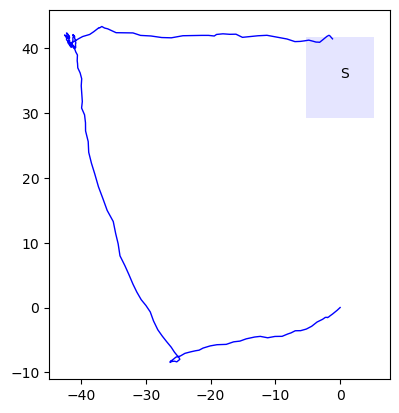

In [36]:

fig = plt.figure()  #create figure to fill in
ax = plt.axes()
    
    #make x and y scales equal - present as a circle


    #plot the center x and y coordinates
x = rotate['rotated_x']
y = rotate['rotated_y']

ax.text(shelter_rotate_x,shelter_rotate_y, 'S', color = 'black', size = 10)
shelter = patches.Rectangle(((shelter_rotate_x - 5.25), (shelter_rotate_y-6.25)), 10.5,12.5,  linewidth = .8, edgecolor = 'none', facecolor = 'blue', alpha = .1)
ax.add_patch(shelter)

ax.set_aspect('equal')
ax.plot(x,y, color = 'blue', linewidth = 1)
